# Data Mining Project on Finding Top Trending Technologies

The whole project comprises of following processes we named them as modules for better understanding:
1. Creating Working Environment
2. Loading Data
3. Data Wrangling
4. Machine Learning
5. Data visualization
6. Creating Dashboards

### 1.Creating Working Environment

Installing Important liberaries with the help of them we will work later.

In [57]:
# installing liberaries to the work envirement
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install folium
#!pip install dash
#!pip install plotly
#!pip install jupyter_dash
#!pip install dash-bootstrap-components
#!pip install wordcloud
#!pip install dash-auth
#!pip install sklearn
#!pip install seaborn

Importing these liberaries into our working environment so that we can use them.

In [58]:
# importing important liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc 
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.cluster import KMeans
import seaborn as sns
import folium
from wordcloud import WordCloud
import dash_auth

### 2.Loading Data 

Now we will load CSV file of data into Pandas DataFrame and explore it,

In [59]:
# loading data from CSV file to a DataFrame
df = pd.read_csv(r'C:\Users\junai\Desktop\Final Year Project\Project\Survey.csv')

In [60]:
# Sample of data
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [61]:
# getting dimenssions of data
dimens = df.shape
print('Number of rows :',dimens[0])
print('Number of columns :',dimens[1])

Number of rows : 64461
Number of columns : 61


In [62]:
# getting brief statistical summary of data
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.187274e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.110000e+247,2.000000e+06,475.000000


Before going to next phase of data wrangling we will evaluate our KPI's and transform our dataset
into final dataframe so that workload of data wrangling could be decreased:

In [63]:
# first of all we need to print all columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [64]:
# select only important columns or KPI's of the dataset to form a new dataset
list = ['Respondent', 'Age','ConvertedComp','CompFreq','CompTotal', 'Country', 'DatabaseDesireNextYear', 'DatabaseWorkedWith','DevType', 'EdLevel', 'Gender','LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith','OpSys','PlatformDesireNextYear',
       'PlatformWorkedWith', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith','WorkWeekHrs','YearsCodePro']
df_final = df[list] 
df_final.head()

,Respondent,Age,ConvertedComp,CompFreq,CompTotal,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,...,MiscTechDesireNextYear,MiscTechWorkedWith,OpSys,PlatformDesireNextYear,PlatformWorkedWith,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCodePro
0,1,NaN,NaN,Monthly,NaN,Germany,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,.NET Core;Xamarin,.NET;.NET Core,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,50.0,27
1,2,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,React Native;TensorFlow;Unity 3D,React Native,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,4
2,3,NaN,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,...,NaN,NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,25.0,NaN,NaN,NaN,Albania,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,NaN,NaN,Linux-based,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,40.0,4
4,5,31.0,NaN,NaN,NaN,United States,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,Ansible;Chef,Ansible,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,NaN,8


In [65]:
dimens_final = df_final.shape
print('Number of columns before was:',dimens[1],'And Now are reduced to :',dimens_final[1])

Number of columns before was: 61 And Now are reduced to : 23


In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              64461 non-null  int64  
 1   Age                     45446 non-null  float64
 2   ConvertedComp           34756 non-null  float64
 3   CompFreq                40069 non-null  object 
 4   CompTotal               34826 non-null  float64
 5   Country                 64072 non-null  object 
 6   DatabaseDesireNextYear  44070 non-null  object 
 7   DatabaseWorkedWith      49537 non-null  object 
 8   DevType                 49370 non-null  object 
 9   EdLevel                 57431 non-null  object 
 10  Gender                  50557 non-null  object 
 11  LanguageDesireNextYear  54113 non-null  object 
 12  LanguageWorkedWith      57378 non-null  object 
 13  MiscTechDesireNextYear  42379 non-null  object 
 14  MiscTechWorkedWith      40314 non-null

In [67]:
df_final.dtypes

Respondent                  int64
Age                       float64
ConvertedComp             float64
CompFreq                   object
CompTotal                 float64
Country                    object
DatabaseDesireNextYear     object
DatabaseWorkedWith         object
DevType                    object
EdLevel                    object
Gender                     object
LanguageDesireNextYear     object
LanguageWorkedWith         object
MiscTechDesireNextYear     object
MiscTechWorkedWith         object
OpSys                      object
PlatformDesireNextYear     object
PlatformWorkedWith         object
UndergradMajor             object
WebframeDesireNextYear     object
WebframeWorkedWith         object
WorkWeekHrs               float64
YearsCodePro               object
dtype: object

### 3.Data Wrangling

Now we will do Data Wrangling or Data cleaning or Data Pre-Processing,

#### Duplicate Values

In [68]:
# getting number of duplicates
duplicates = df_final[df_final.duplicated()]
print('Number of duplicates values are :',len(duplicates))

Number of duplicates values are : 0


#### Missing Values

In [69]:
#getting number of missing values
missing = df_final.isnull().sum()
print('The number of missing values for each column are as :')
print(missing)

The number of missing values for each column are as :
Respondent                    0
Age                       19015
ConvertedComp             29705
CompFreq                  24392
CompTotal                 29635
Country                     389
DatabaseDesireNextYear    20391
DatabaseWorkedWith        14924
DevType                   15091
EdLevel                    7030
Gender                    13904
LanguageDesireNextYear    10348
LanguageWorkedWith         7083
MiscTechDesireNextYear    22082
MiscTechWorkedWith        24147
OpSys                      8233
PlatformDesireNextYear    13856
PlatformWorkedWith        10618
UndergradMajor            13466
WebframeDesireNextYear    24437
WebframeWorkedWith        22182
WorkWeekHrs               23310
YearsCodePro              18112
dtype: int64


#### Imputing Missing Values

For Columns Age,ConvertedComp, and WorkWeekHrs we can impute missing values with their mean values as all of them are numeric values:

In [70]:
pd.set_option('mode.chained_assignment', None)
df_final['Age'].fillna(df_final['Age'].mean(),inplace=True)
df_final['CompTotal'].fillna(df_final['CompTotal'].mean(),inplace=True)
df_final['ConvertedComp'].fillna(df_final['ConvertedComp'].mean(),inplace=True)
df_final['WorkWeekHrs'].fillna(df_final['WorkWeekHrs'].mean(),inplace=True)

We have column 'Age' with float values so we will round off it first

In [71]:
df_final['Age'] = df_final['Age'].round(0)

To impute the catgorical columns we have two methods as we can impute by MAX value counts or we just delete that rows. 
But to retain the validitity and impartiality of our data we will drop that rows:

In [72]:
df_final.dropna(axis=0,inplace=True)
df_final.reset_index(drop=True,inplace=True)


In [73]:
df_final.isnull().sum()

Respondent                0
Age                       0
ConvertedComp             0
CompFreq                  0
CompTotal                 0
Country                   0
DatabaseDesireNextYear    0
DatabaseWorkedWith        0
DevType                   0
EdLevel                   0
Gender                    0
LanguageDesireNextYear    0
LanguageWorkedWith        0
MiscTechDesireNextYear    0
MiscTechWorkedWith        0
OpSys                     0
PlatformDesireNextYear    0
PlatformWorkedWith        0
UndergradMajor            0
WebframeDesireNextYear    0
WebframeWorkedWith        0
WorkWeekHrs               0
YearsCodePro              0
dtype: int64

Now we have verfied that there is no missing value left in our dataset.

#### Normalizing Data

We have a CompFreq with three different values which need to be normalized:

In [74]:
df_final['CompFreq'].value_counts()

Yearly     7192
Monthly    6634
Weekly      455
Name: CompFreq, dtype: int64

In [75]:
conditions = [(df_final['CompFreq']=='Yearly'),
             (df_final['CompFreq']=='Monthly'),
             (df_final['CompFreq']=='Weekly') ]
values = [(df_final['CompTotal']),
    (df_final['CompTotal']*12),
    (df_final['CompTotal']*52)]
df_final['NormalizedAnnualCompensation'] = np.select(conditions,values)

In [76]:
df_final[['NormalizedAnnualCompensation']].head()

,NormalizedAnnualCompensation
0,3.824729e+243
1,1.160000e+05
2,2.500000e+04
3,3.100000e+04
4,6.600000e+04


#### Outliers

We have to find outliers also for a fair and accurate data analysis so we are now identifying the ootliers first and then we have to remove them.

<AxesSubplot:>

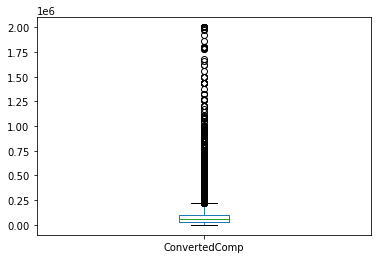

In [77]:
df_final['ConvertedComp'].plot(kind='box')

Now we will remove these outliers by finding the IQR and Upper and lower bounds as:

In [78]:
#find out the Inter Quartile Range (IQR)
Q1 = df_final['ConvertedComp'].quantile(0.25)
Q3 = df_final['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

77306.05014961446

In [79]:
#find out the upper and lower bounds
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
upper,lower

(219715.12537403614, -89509.07522442169)

In [80]:
#find out the number of outliers
outliers = [x for x in df_final['ConvertedComp'] if x < lower or x > upper]
print(len(outliers))

661


In [81]:
#create a new dataframe and replace it
new_df = [x for x in df_final['ConvertedComp'] if x >= lower and x <= upper]
new_df = pd.DataFrame(new_df)
new_df.columns = ['ConvertedComp']
new_df.head()

,ConvertedComp
0,103756.05015
1,116000.00000
2,32315.00000
3,40070.00000
4,66000.00000


<AxesSubplot:>

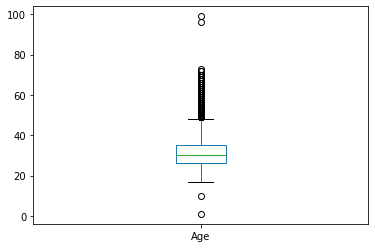

In [82]:
df_final['Age'].plot(kind='box')

In [83]:
#find out the Inter Quartile Range (IQR)
Q1_age = df_final['Age'].quantile(0.25)
Q3_age = df_final['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
IQR_age

9.0

In [84]:
upper_age = Q3_age+(1.5*IQR_age)
lower_age = Q1_age-(1.5*IQR_age)
upper_age,lower_age

(48.5, 12.5)

In [85]:
#find out the number of outliers
outliers_age = [x for x in df_final['Age'] if x < lower_age or x > upper_age]
print(len(outliers_age))

513


In [86]:
#create a new dataframe and replace it
new_df_age = [x for x in df_final['Age'] if x >= lower_age and x <= upper_age]
new_df_age = pd.DataFrame(new_df_age)
new_df_age.columns = ['Age']
new_df_age.head()

,Age
0,31.0
1,36.0
2,22.0
3,23.0
4,27.0


In [87]:
#replacing the dataset
df_final['ConvertedComp'] = new_df['ConvertedComp']
df_final['Age'] = new_df_age['Age']

In [88]:
#verifying the resuilts
outliers_age = [x for x in df_final['Age'] if x < lower_age or x > upper_age]
print(len(outliers_age))

0


In [89]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [90]:
df_copy = df_final['EdLevel'].apply(lambda x:x[0:12])
df_final['EdLevel'] = df_copy
df_final['EdLevel'].unique()

array(['Master’s deg', 'Bachelor’s d', 'Associate de', 'Some college',
       'Other doctor', 'Professional'], dtype=object)

### 4.Machine Learning

Now we will use Machine Learning Algorithms to analyze our data and evaluate the performance of our model.

#### Creating Feature Set of DataFrame

First we will create our feature set

In [91]:
# use two features. ConvertedComp is the target variable: salary
columns = ['EdLevel','Country','ConvertedComp'] 
df_mod = pd.DataFrame(df_final, columns=columns) 
df_mod.head(10)

,EdLevel,Country,ConvertedComp
0,Master’s deg,Germany,103756.05015
1,Bachelor’s d,United States,116000.00000
2,Master’s deg,United Kingdom,32315.00000
3,Bachelor’s d,United Kingdom,40070.00000
4,Associate de,United States,66000.00000
5,Bachelor’s d,United States,83400.00000
6,Bachelor’s d,United Kingdom,38778.00000
7,Bachelor’s d,Belgium,63564.00000
8,Some college,United Kingdom,77556.00000
9,Associate de,France,103756.05015


In [92]:
#find out the median of salary
salary_med = df_mod['ConvertedComp'].median()
y = df_mod['ConvertedComp'].apply(lambda x:0 if x<=salary_med else 1)
df_mod['income'] = y
df_mod.head()

,EdLevel,Country,ConvertedComp,income
0,Master’s deg,Germany,103756.05015,1
1,Bachelor’s d,United States,116000.00000,1
2,Master’s deg,United Kingdom,32315.00000,0
3,Bachelor’s d,United Kingdom,40070.00000,0
4,Associate de,United States,66000.00000,1


In [93]:
# normalize the EdLevel 
df_mod['EdLevel'] = df_mod['EdLevel'].astype(str)
df_mod['EdLevel'] = df_mod['EdLevel'].apply(lambda x:x[0:4])
df_mod.head()

,EdLevel,Country,ConvertedComp,income
0,Mast,Germany,103756.05015,1
1,Bach,United States,116000.00000,1
2,Mast,United Kingdom,32315.00000,0
3,Bach,United Kingdom,40070.00000,0
4,Asso,United States,66000.00000,1


In [94]:
#create x and y feature set
feature_col = ['EdLevel','Country']
columns = ['EdLevel','Country']
X = pd.DataFrame(df_mod,columns=columns)
X.head()

,EdLevel,Country
0,Mast,Germany
1,Bach,United States
2,Mast,United Kingdom
3,Bach,United Kingdom
4,Asso,United States


In [95]:
#convert catagorical data into numeric set
X = pd.get_dummies(X)
X.head()

,EdLevel_Asso,EdLevel_Bach,EdLevel_Mast,EdLevel_Othe,EdLevel_Prof,EdLevel_Some,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Argentina,...,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Decision Tree Classification

In [96]:
# split dataset into x,y train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=1)

In [97]:
mod1 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, random_state=1)
mod1 = mod1.fit(X_train,y_train)
y_pred = mod1.predict(X_test)
print('Accuracy Score is :',metrics.accuracy_score(y_test,y_pred))

Accuracy Score is : 0.5284234108092971


#### K-Means Classification

In [98]:
group = df_mod.groupby('income')
df_mod2 = pd.DataFrame(group.get_group(0), columns = df_mod.columns)
df_mod2.head()

,EdLevel,Country,ConvertedComp,income
2,Mast,United Kingdom,32315.0,0
3,Bach,United Kingdom,40070.0,0
6,Bach,United Kingdom,38778.0,0
13,Bach,United States,52000.0,0
14,Bach,Brazil,16488.0,0


In [99]:
X2 = df_mod2.drop(['ConvertedComp','income'],axis=1)
X2 = pd.get_dummies(X2)
mod2 = KMeans(n_clusters=2)
y2 = mod2.fit_predict(X2)

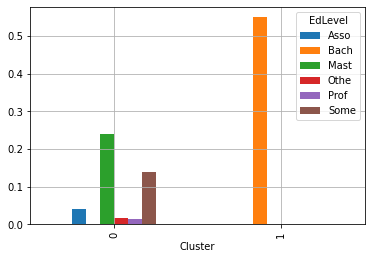

In [100]:
df_mod2['Cluster'] = y2
churn_crosstab = pd.crosstab(df_mod2['Cluster'],df_mod2["EdLevel"],  normalize=True)
churn_crosstab.plot(kind = 'bar', grid=True) 
plt.show() 

Cluster 0: Other Degree, Cluster 1: Bechelors

In [101]:
def select_countries(x):
    if x =="United States":
        x = "USA"
    elif x == "United Kingdom":
        x = "UK" 
    elif x == "India":
        x = "India" 
    elif x == "Germany":
        x = "Germany" 
    elif x== 'Pakistan':
        x='Pakistan'
    else:
        x = "Others"
    return x
    
df_mod2['Country']  = df_mod2['Country'].astype(str)
df_mod2['Country'] = df_mod2['Country'].apply(lambda x: select_countries(x))
df_mod2.head(5)

,EdLevel,Country,ConvertedComp,income,Cluster
2,Mast,UK,32315.0,0,0
3,Bach,UK,40070.0,0,1
6,Bach,UK,38778.0,0,1
13,Bach,USA,52000.0,0,1
14,Bach,Others,16488.0,0,1


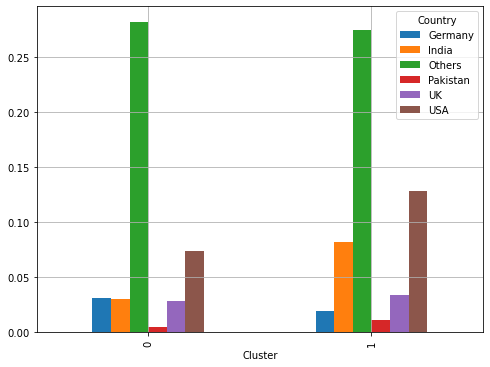

In [102]:
churn_crosstab = pd.crosstab(df_mod2['Cluster'],df_mod2['Country'],  normalize=True)
churn_crosstab.plot(kind = 'bar', grid=True,figsize=(8,6)) 
plt.show() 

#### Conclusion:

Most of Pakistani Respondents belongs to cluster 1 which means most of them have bechlors degree.

### Visualization

Now We Will Visualize some of figures before moving on to Dashboard.

#### Choropleth Map 

In [103]:
m = folium.Map(location=[30, 0], zoom_start=2)
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
country_counts = df_final.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'
folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 13_000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

#### Word Cloud

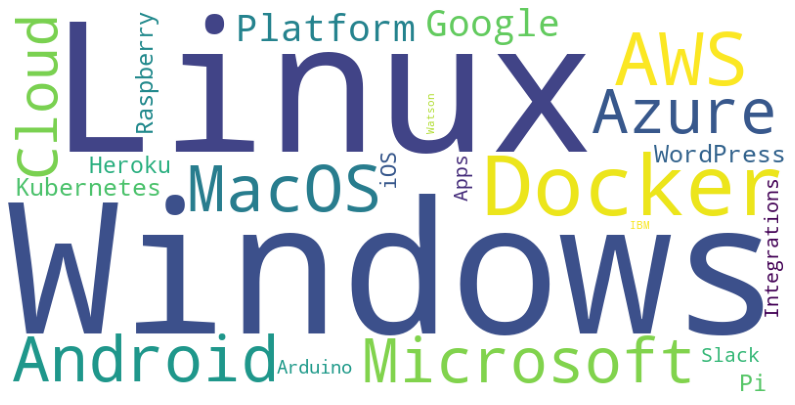

In [104]:
words = ' '.join((job for job in df_final.PlatformWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

#### 3D Scatter Plot

In [105]:
fig = px.scatter_3d(df_final, x='ConvertedComp', y='YearsCodePro', z='Age',height = 700,
              color='Respondent',color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

#### Pie Chart

<AxesSubplot:title={'center':'Education Level'}, ylabel='EdLevel'>

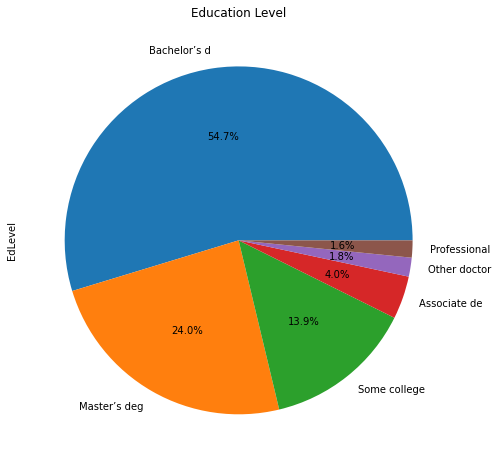

In [106]:
df_final['EdLevel'].value_counts().plot(kind='pie', title = 'Education Level', autopct='%1.1f%%',figsize=(10,8))

## 6. Creating Dashboard

In [107]:
app = JupyterDash(__name__)
#JupyterDash.infer_jupyter_proxy_config()

In [108]:
app.config.suppress_callback_exceptions = True

In [109]:
def current_trend(df_final):
    #top 10 prog. languages
    prog_lang = split_multicolumn(df_final.LanguageWorkedWith)
    prog_lang_percent = prog_lang.mean().sort_values(ascending=False)*100
    prog_lang_percent=prog_lang_percent.head(10)
    #top 10 databases
    databases = split_multicolumn(df_final.DatabaseWorkedWith)
    database_percent = databases.mean().sort_values(ascending=False)*100
    database_percent = database_percent.head(10)
    #top plateforms
    plateforms = split_multicolumn(df_final.PlatformWorkedWith)
    plateforms_percent = plateforms.mean().sort_values(ascending=False)*100
    plateforms_percent = plateforms_percent.head()
    #top webframeworks
    webframe = split_multicolumn(df_final.WebframeWorkedWith)
    webframe_percent = webframe.mean().sort_values(ascending=False)*100
    webframe_percent = webframe_percent.head(10)
    return prog_lang_percent,database_percent, plateforms_percent,webframe_percent

In [110]:
def future_trend(df_final):
    #top 10 prog. languages
    prog_lang_n = split_multicolumn(df_final.LanguageDesireNextYear)
    prog_lang_n_percent = prog_lang_n.mean().sort_values(ascending=False)*100
    prog_lang_n_percent=prog_lang_n_percent.head(10)
    #top 10 databases
    databases_n = split_multicolumn(df_final.DatabaseDesireNextYear)
    database_n_percent = databases_n.mean().sort_values(ascending=False)*100
    database_n_percent = database_n_percent.head(10)
    #top_plateforms
    plateforms_n = split_multicolumn(df_final.PlatformDesireNextYear)
    plateforms_n_percent = plateforms_n.mean().sort_values(ascending=False)*100
    plateforms_n_percent = plateforms_n_percent.head()
    #top webframeworks
    webframe_n = split_multicolumn(df_final.WebframeDesireNextYear)
    webframe_n_percent = webframe_n.mean().sort_values(ascending=False)*100
    webframe_n_percent = webframe_n_percent.head(10)
    return prog_lang_n_percent,database_n_percent,plateforms_n_percent,webframe_n_percent

In [111]:
def demographics(df_final):
    gen_data = split_multicolumn(df_final.Gender)
    gen_perc = gen_data.mean().sort_values(ascending=False)*100
    #
    tree_data = df_final.groupby(['Country'])['Respondent'].count().reset_index()
    #
    age_count = df_final.groupby(['Age'])['Respondent'].count().reset_index()
    #
    edu_count = df_final.groupby(['EdLevel'])['Respondent'].count().reset_index()
    return gen_perc,tree_data, age_count,edu_count

In [ ]:
import dash_html_components as html
import dash
import dash_bootstrap_components as dbc
from wordcloud import WordCloud
app = dash.Dash( 'auth',
    external_stylesheets=[dbc.themes.CERULEAN]
)
VALID_USERNAME_PASSWORD_PAIRS = [
    ['admin', 'admin']
]
auth = dash_auth.BasicAuth(
    app,
    VALID_USERNAME_PASSWORD_PAIRS
)
style_gp = {
    'box-shadow': '0 3px 10px rgb(0 0 0 / 0.4)',
    'border':'1px solid black',
}

#get graphs for current tab
prog_lang_percent,database_percent, plateforms_percent,webframe_percent = current_trend(df_final)
lang_bar = px.bar(x=prog_lang_percent.index,y=prog_lang_percent,color=prog_lang_percent,title='Top 10 Programming Languages used by Developers (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.OrRd)
db_bar = px.bar(x=database_percent.index,y=database_percent,color=database_percent,title='Top 10 Databases used by Developers (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.RdPu)
pw_bar  = px.bar(x= plateforms_percent.index,y= plateforms_percent,color=plateforms_percent,title='Top Plateforms used by Developers (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.speed)
fw = px.funnel(webframe_percent,x=webframe_percent, y=webframe_percent.index,title='Top WebFrameWorks used by Developers (%)',labels={'index':' '})
#get graph for next tab
prog_lang_n_percent,database_n_percent,plateforms_n_percent,webframe_n_percent = future_trend(df_final)
lang_n_bar = px.bar(x=prog_lang_n_percent.index,y=prog_lang_n_percent,color=prog_lang_n_percent,title='Top 10 Programming Languages Desire NextYear (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.deep)
db_n_bar = px.bar(x=database_n_percent.index,y=database_n_percent,color=database_n_percent,title='Top 10 Databases Desire NextYear (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.matter)
pw_n_bar  = px.bar(x= plateforms_n_percent.index,y= plateforms_n_percent,color=plateforms_n_percent,title='Top Plateforms Desire NextYear (%)',labels={'x':' ','y':' '},color_continuous_scale=px.colors.sequential.Purpor)
fw_n = px.funnel(webframe_n_percent,x=webframe_n_percent, y=webframe_n_percent.index,title='Top WebFrameWorks Desire NextYear (%)',labels={'index':' '})
#get graph for demograph tab
gen_perc,tree_data, age_count,edu_count = demographics(df_final)
labels = gen_perc.index
values = gen_perc
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',titleposition='bottom center',
                             insidetextorientation='radial',showlegend=False,title='Developer Catagorize by Gender (%)'
                            )])
gen_pie = fig
tree_fig = px.treemap(tree_data,path=['Country'],values='Respondent',color='Respondent',color_continuous_scale='RdBu',title='Developers Counts by Countries (Count)')
line_graph = px.line(age_count,x='Age',y='Respondent',title='Developers by Age (Count)')
long_bar = px.bar(edu_count,x='EdLevel',y='Respondent',color='Respondent',labels={'EdLevel':'','Respondent':''},title='Developers Catgorized by Education Level (Count)',color_continuous_scale=px.colors.sequential.dense)
# current tab layout
curr_layout = html.Div(children=[dbc.Container([
            dbc.Row([
                dbc.Col([dcc.Graph(id='lang_bar',figure=lang_bar)], width=6,style = style_gp),
                dbc.Col([dcc.Graph(id='db_bar',figure=db_bar)], width=6,style = style_gp)
                
            ]),
            dbc.Row([
                dbc.Col([dcc.Graph(id='pw_bar',figure=pw_bar)], width=6,style =style_gp),
                dbc.Col([dcc.Graph(id='fw',figure=fw)], width=6,style =style_gp)
            ]),
            
        ])])
#in future tab layout
next_layout = html.Div(children=[dbc.Container([
            dbc.Row([
                dbc.Col([dcc.Graph(id='lang_n_bar',figure=lang_n_bar)], width=6,style =style_gp),
                dbc.Col([dcc.Graph(id='db_n_bar',figure=db_n_bar)], width=6,style =style_gp)
            ]),
            dbc.Row([
                dbc.Col([dcc.Graph(id='pw_n_bar',figure=pw_n_bar)], width=6,style =style_gp),
                dbc.Col([dcc.Graph(id='fw_n',figure=fw_n)], width=6,style =style_gp)
            ]),
            
        ])])
#demographic tab layout
demograph_layout = html.Div(children = [dbc.Container([
            dbc.Row([
                dbc.Col([dcc.Graph(id='gen_pie',figure=gen_pie)], width=6,style =style_gp),
                dbc.Col([dcc.Graph(id='tree',figure=tree_fig)], width=6,style =style_gp)
            ]),
            dbc.Row([
                dbc.Col([dcc.Graph(id='line',figure=line_graph)], width=6,style =style_gp),
                dbc.Col([dcc.Graph(id='long_bar',figure=long_bar)], width=6,style =style_gp)
            ]),
            
        ])])
#tabs layout
app_tabs = html.Div(
    [
        dcc.Tabs(
            [
                dcc.Tab(label="Current Trending Technologies", value="tab-1",style={'font-weight':'bold'}),
                dcc.Tab(label="In Future Trending Technolgies", value="tab-2",style={'font-weight':'bold'}),
                dcc.Tab(label="Demographics", value="tab-3",style={'font-weight':'bold'}),
            ],
            id="tabs",
        ),
    ], className="mt-3"
),
#tab-1 content layout

#app layout
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Developers Survey Analytics Dashboard",
                            style={"textAlign": "center"}), width=12)),
    html.Hr(style={'height':'5px','border-width':'0','background-color':'#00bfff'}),
    dbc.Row(dbc.Col(app_tabs, width=12), className="mb-3"),
    html.Div(id='content', children=[]),
    html.Hr(style={'height':'3px','border-width':'0','background-color':'#00bfff'}),
    html.Footer('Department Of Information Technology BZU. Copyright@2021 BZU, All rights Reserved!',style={'textAlign':'center','font-weight':'bold'}),
    html.Hr(style={'height':'3px','border-width':'0','background-color':'#00bfff'}),

])




@app.callback(Output("content", "children"), [Input("tabs", "value")])
# function that return a tab layout under specific condition
def switch_tab(at):
    if at == "tab-1":
        return curr_layout                   
    elif at == "tab-2":
        return next_layout
    elif at == 'tab-3':
        return demograph_layout
             
#run the app in development server
if __name__ == "__main__":
    app.run_server(port=443)

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

 * Serving Flask app "auth" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:443/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Sep/2021 18:38:33] "GET / HTTP/1.1" 401 -
127.0.0.1 - - [16/Sep/2021 18:41:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2021 18:41:35] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2021 18:41:35] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2021 18:41:35] "GET /_favicon.ico?v=1.20.0 HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2021 18:41:35] "POST /_dash-update-component HTTP/1.1" 200 -
